<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%ED%95%B8%EB%93%A4%EB%A7%81/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8A%A4%EC%BF%A8_0526.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crawling (크롤링)

- 웹 상의 데이터를 수집하기 위해서 크롤링을 사용
- 웹 페이지 접속 (요청) -> (응답) -> 해당 웹 페이지 어디에 위치? -> 값을 가져옴 
- -> 어떤 데이터 형식인지 -> 데이터 변환 -> 데이터 저장 
- Python 라이브러리 : Numpy, Pandas, Requests, BeautifulSoup
- 데이터 수집

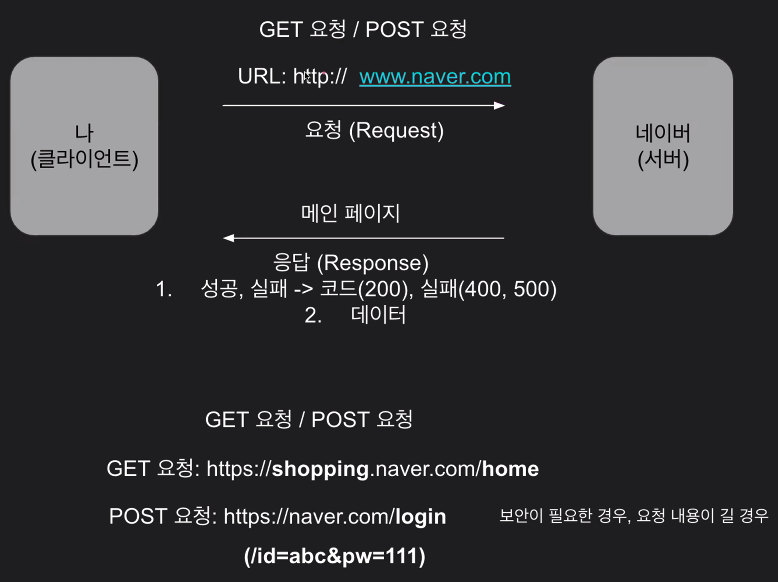

프로토콜 
- http:// -> 웹 상에서 데이터를 주고받을 때 사용하는 약속(규약)

요청(Request)
- GET 요청 : https://shopping.naver.com/home
- POST 요청 : https://naver.com/login (/id=abc&pw=111)
    - 보안이 필요한 경우, 요청 내용이 길 경우 

응답 (Response)
1. 성공/실패 -> 코드(200), 실패(400, 500)
2. 데이터
---

> Requests -> BeautifulSoup -> 변환, 접근

## Requests

- HTTP 요청을 보내는 데 사용하는 라이브러리
- 클라이언트의 요청

In [1]:
# !pip install requests
import requests

In [2]:
print(requests.__version__)

2.27.1


In [3]:
# GET 요청 
url = 'http://www.paullab.co.kr/stock.html'
html = requests.get(url)
html

<Response [200]>

In [4]:
'''
# POST 요청 보내는 방법 
import json

body = {'id': 'aaa', 'pw': 1234}
post = requests.post('url', data=json.dumps(body))
'''

"\n# POST 요청 보내는 방법 \nimport json\n\nbody = {'id': 'aaa', 'pw': 1234}\npost = requests.post('url', data=json.dumps(body))\n"

## BeautifulSoup

- html을 나타내는 객체로 바꿔줌 -> 태그명으로 접근 가능 

In [5]:
from bs4 import BeautifulSoup

text = html.text
soup = BeautifulSoup(text, 'html.parser') # 'html.parser', 'xml'
# soup

### find / find_all

In [6]:
soup.title
soup.find('title') # 동일

<title>Document</title>

In [7]:
soup.title.string
soup.title.text # 동일 

'Document'

In [8]:
# soup.table
soup.find('table') # find -> 첫번째 값만 
'''
<table> </table>
<tr> </tr>
<th> </th>
<td> </td>
'''

'\n<table> </table>\n<tr> </tr>\n<th> </th>\n<td> </td>\n'

In [9]:
soup.tr

<tr>
<th class="strong" scope="row">시가총액</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>

In [54]:
t = soup.find_all('table') 

`<태그 속성 = '값'></태그>`

`id='stock'`: 페이지 당 하나 -> selector 

`class='2022'`: 페이지(html 파일 안에) 당 -> selector(선택자)

In [55]:
t = soup.find_all('table', class_='table')[0]  # find_all -> list로 반환 

In [12]:
tag = soup.find(id=('update'))
tag

<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>

In [13]:
dir(tag) # dir -> 어떤 객체 .을 찍고 사용할 수 있는 메서드의 목록 

['DEFAULT_INTERESTING_STRING_TYPES',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_namespaces',
 '_should_pretty_print',
 'append',
 'attrs',
 'can_be_empty_element',
 'cdata_list_attributes',
 'childGenerator',
 'children',
 'clear',
 'contents',
 'decode',
 'decode_contents',
 'decompose',
 'decomposed',
 'default',
 'descendants',
 'encode',
 'encode_contents',
 'extend',
 'extract',
 'fetchNextSiblings'

In [14]:
tag.name

'span'

In [15]:
tag['id']

'update'

### select
- id: `#id명`
- class: `.class명`

In [16]:
# soup.find(id=('update'))
soup.select('#update')

[<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>]

In [56]:
# soup.find_all('table', class_='table')
t = soup.select('.table') # list 형 반환 

```
<table> <tbody> <tr> ... </tr> </tbody> </table>
<table> > <tbody> > <tr>
```

In [57]:
t = soup.select('.table > tbody') # table 클래스 안에 있는 tbody 태그 찾기 

In [19]:
soup.select('.table > tr') # tbody 바로 아래에는 tbody가 존재하므로 tr에 바로 접근 불가

[]

In [58]:
t = soup.select('.table > tbody > tr')

> 여러 번 접근하기

In [61]:
one = soup.select('.main')[2]
two = one.select('tbody > tr')
# div > h2, h3, table

# 크롬 브라우저 -> 오른쪽 클릭 -> 검사 -> (왼쪽 상단) 마우스 클릭 모양 선택 -> 내가 원하는 곳을 찾는다.
# -> 오른쪽 클릭 -> copy -> copy select -> 자동으로 경로 복사
# body > div:nth-child(5) > table

## FinanceDataReader

- 주식 가격, 지수, 환율, 암호 화폐 가격
- 시계열 데이터 수집
- 거래소별, 종목(코드)별, 단축(코드)별 데이터 수집 가능

In [23]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import FinanceDataReader as fdr

In [25]:
fdr.__version__

'0.9.50'

### `StockListing`
- KRX 한국 거래소 
- KOSPI 코스피 종목
- KODAQ 코스닥
- NASDAQ 나스닥
- NYSE 뉴욕 증권 거래소
- S&P500 미국.. -> 지수 데이터 

In [26]:
# fdr 이용해서 데이터를 불러오면 -> DataFrame 형태
df_krx = fdr.StockListing('krx') 

In [27]:
df_krx.head() # 삼성전자의 코드번호 알아옴 

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,70300,1,1500,2.18,69800,70400,69500,19549511,1370668892150,419675713265000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,578000,2,-5000,-0.86,580000,583000,575000,113909,65876235000,135252000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,109200,1,5700,5.51,107500,110500,106100,10136706,1096927604183,79497858258000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,777000,2,-2000,-0.26,778000,782000,773000,26777,20820335000,55302198000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,706000,2,-6000,-0.84,708000,716000,697000,133917,94461654000,49838194158000,70592343,STK


In [28]:
df_krx.shape # 2717개 주식 종목의 17가지 정보 

(2717, 17)

In [29]:
df_krx.describe()

,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2.717000e+03,2.717000e+03,2.717000e+03,2.717000e+03
mean,-132.883695,-0.586688,20875.461907,21134.966507,20506.766654,6.686237e+05,6.434566e+09,8.964942e+11,4.186701e+07
std,950.560812,3.035047,53288.102323,53768.544414,52542.783276,3.365294e+06,3.996815e+10,9.074534e+12,1.343060e+08
min,-24500.000000,-15.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.040000e+09,1.098520e+05
25%,-150.000000,-1.730000,2885.000000,2960.000000,2815.000000,1.899900e+04,1.237894e+08,6.283355e+10,1.001394e+07
50%,-30.000000,-0.620000,6830.000000,6990.000000,6650.000000,7.689100e+04,4.852449e+08,1.258814e+11,1.954779e+07
75%,5.000000,0.130000,16880.000000,17200.000000,16560.000000,2.610870e+05,2.356161e+09,3.003873e+11,4.123263e+07
max,13000.000000,30.000000,778000.000000,782000.000000,773000.000000,8.187279e+07,1.370669e+12,4.196757e+14,5.969783e+09


In [30]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2717 non-null   object 
 1   ISU_CD       2717 non-null   object 
 2   Name         2717 non-null   object 
 3   Market       2717 non-null   object 
 4   Dept         2717 non-null   object 
 5   Close        2717 non-null   object 
 6   ChangeCode   2717 non-null   object 
 7   Changes      2717 non-null   int64  
 8   ChagesRatio  2717 non-null   float64
 9   Open         2717 non-null   int64  
 10  High         2717 non-null   int64  
 11  Low          2717 non-null   int64  
 12  Volume       2717 non-null   int64  
 13  Amount       2717 non-null   int64  
 14  Marcap       2717 non-null   int64  
 15  Stocks       2717 non-null   int64  
 16  MarketId     2717 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 361.0+ KB


### `DataReader`
> '005930' 코드번호 -> 단일 종목의 주식 데이터

`fdf.DataReader('코드', '시작연도 or 연-월-일', '종료연도 or 연-월-일')`

In [31]:
samsung_df = fdr.DataReader('005930')
# samsung_df

In [32]:
samsung_df_2022 = fdr.DataReader('005930', '2022-01-03', '2022-03-31') # 날짜 지정
samsung_df_2022

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
2022-01-10,78100,78100,77100,78000,9947422,-0.003831
2022-01-11,78400,79000,78000,78900,13221123,0.011538
2022-01-12,79500,79600,78600,78900,11000502,0.000000
2022-01-13,79300,79300,77900,77900,13889401,-0.012674


In [33]:
# 상장폐지 종목 데이터
del_stock = fdr.DataReader('003497', exchange='krx-delisting') # 003497 상장 폐지 -> krx에는 데이터가 없음
del_stock

,Date,Code,Name,Market,SecuGroup,Close,UpDown,Change,ChangeRate,Open,High,Lower,Volume,Amount,MarCap
0,2001-04-13,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
1,2001-04-12,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
2,2001-04-11,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
3,2001-04-10,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
4,2001-04-09,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1998-04-30,003497,대한항공(2우B),KOSPI,주권,1915,1,5,0.26,1915,1915,1915,110,210650,660282425
754,1998-04-29,003497,대한항공(2우B),KOSPI,주권,1910,2,-95,-4.74,1910,1910,1910,430,821300,658558450
755,1998-04-28,003497,대한항공(2우B),KOSPI,주권,2005,1,5,0.25,2005,2005,2005,100,200500,691313975
756,1998-04-27,003497,대한항공(2우B),KOSPI,주권,2000,1,90,4.71,1910,2000,1910,260,501100,689590000


<Axes: xlabel='Date'>

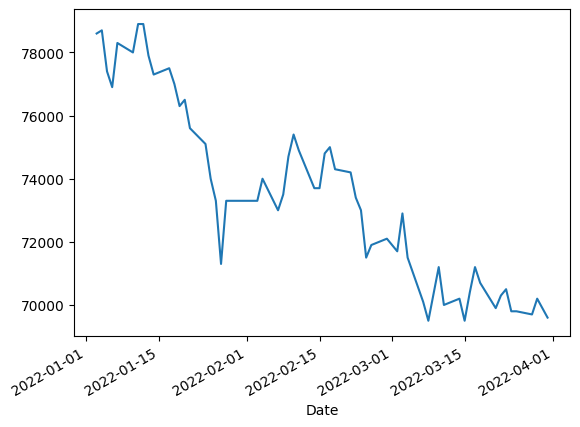

In [34]:
samsung_df_2022['Close'].plot() # 종가 그래프 
# samsung_df_2022['Open'].plot() # 시가 그래프 

> 환율 데이터 

In [35]:
ex_us_kw_df = fdr.DataReader('USD/KRW', '2023')
ex_us_kw_df
'''
EUR/USD (유로당 달러)
CNY/KRW (위엔당 원)
JPY/KRW (엔당 원)
USD/JPY (달러당 엔)
'''

'\nEUR/USD (유로당 달러)\nCNY/KRW (위엔당 원)\nJPY/KRW (엔당 원)\nUSD/JPY (달러당 엔)\n'

<Axes: xlabel='Date'>

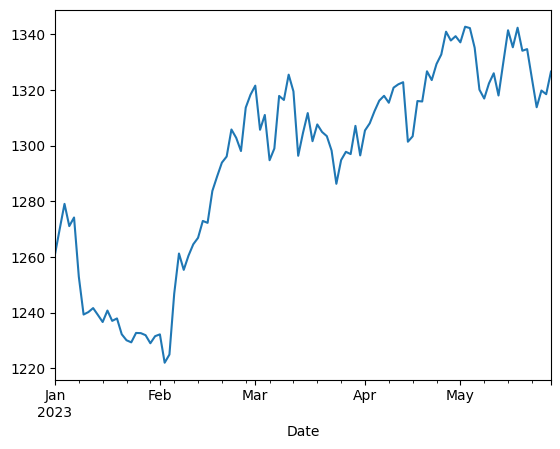

In [36]:
ex_us_kw_df['Close'].plot()

> 암호화폐 데이터

- BTC/KRW (비트코인당 원)
- ETH/KRW (이더리움당 원)
- XRP/KRW (리플당 원)
- BTC/USD (비트코인당 달러)

In [37]:
btc_krw_df = fdr.DataReader('BTC/KRW', '2023')
btc_krw_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,20881980.0,20983694.0,20848310.0,20976934.0,20976934.0,11664205615481
2023-01-02,20977476.0,21355044.0,20930146.0,21196110.0,21196110.0,15365444804389
2023-01-03,21196588.0,21310532.0,21286596.0,21340292.0,21340292.0,17787669052216
2023-01-04,21340738.0,21612098.0,21267144.0,21440006.0,21440006.0,23421496568532
2023-01-05,21440302.0,21411704.0,21411510.0,21458506.0,21458506.0,17451489256812
...,...,...,...,...,...,...
2023-05-22,35937472.0,36132932.0,35393188.0,35454384.0,35454384.0,11459626783399
2023-05-23,35449176.0,35568568.0,35105516.0,35287412.0,35287412.0,14530586645292
2023-05-24,35293568.0,35985904.0,35170116.0,35943132.0,35943132.0,18082910616976


<Axes: xlabel='Date'>

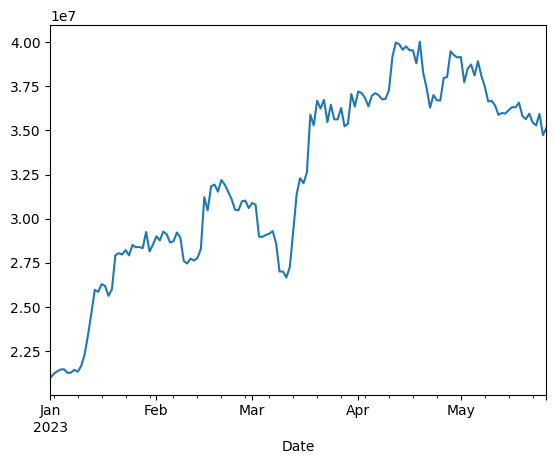

In [38]:
btc_krw_df['Close'].plot()

---
- 웹 상의 데이터 크롤링
- 파일 형태의 데이터들
    - 한글, 엑셀, pdf

## 파일 데이터

### 한글(.hwp) 파일 크롤링
- ole 라이브러리

In [39]:
!pip install ole-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import os
import pandas as pd
import ole

# 경로 설정
dir_path = 'data_hwp/'

# 파일 이름 설정
hwp_name = '예제.hwp'

# 경로 + 파일
hwp_path = os.path.join(dir_path, hwp_name)

# 불러오기
f = ole.open(hwp_path)

content = f.get_stream('PrvText').read().decode('utf-16le')
print(content)

"import os\nimport pandas as pd\nimport ole\n\n# 경로 설정\ndir_path = 'data_hwp/'\n\n# 파일 이름 설정\nhwp_name = '예제.hwp'\n\n# 경로 + 파일\nhwp_path = os.path.join(dir_path, hwp_name)\n\n# 불러오기\nf = ole.open(hwp_path)\n\ncontent = f.get_stream('PrvText').read().decode('utf-16le')\nprint(content)"

In [41]:
# excel 파일로 변환하기
columns = ['Name', 'Company', 'Phone', 'e-mail', 'why', 'experience']
df = pd.DataFrame(columns=columns)

# 읽어온 값을 hwp 분리해서 딕셔너리
word_list = content.split('><')
target_list = ['성    명', '소    속', '연 락 처', 'E-mail', '지원 동기', '연 령 대']

info_dict = {} # 데이터 추출 후 저장할 빈 딕셔너리

# 데이터 프레임으로 만들기
for n, target in enumerate(target_list):
    info = word_list[word_list.index(target) + 1]
    info_dict[columns[n]] = info

df = pd.DataFrame(data=info_dict, index=[0], columns=columns)
df

"# excel 파일로 변환하기\ncolumns = ['Name', 'Company', 'Phone', 'e-mail', 'why', 'experience']\ndf = pd.DataFrame(columns=columns)\n\n# 읽어온 값을 hwp 분리해서 딕셔너리\nword_list = content.split('><')\ntarget_list = ['성    명', '소    속', '연 락 처', 'E-mail', '지원 동기', '연 령 대']\n\ninfo_dict = {} # 데이터 추출 후 저장할 빈 딕셔너리\n\n# 데이터 프레임으로 만들기\nfor n, target in enumerate(target_list):\n    info = word_list[word_list.index(target) + 1]\n    info_dict[columns[n]] = info\n\ndf = pd.DataFrame(data=info_dict, index=[0], columns=columns)\ndf"

In [42]:
# 엑셀 파일로 추출
df.to_exel('예제.xlsx')

"# 엑셀 파일로 추출\ndf.to_exel('예제.xlsx')"

https://cdn.hancom.com/link/docs/%ED%95%9C%EA%B8%80%EB%AC%B8%EC%84%9C%ED%8C%8C%EC%9D%BC%ED%98%95%EC%8B%9D_5.0_revision1.2.pdf

http://www.terms.co.kr/OLE.htm

http://www.decalage.info/file_formats_security/office

### pdf 파일 크롤링

In [43]:
!pip install pdfminer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.4 MB/s eta 0:00:00
  Created wheel for pdfminer: filename=pdfminer-20191125-py3-none-any.whl size=6140103 sha256=c5ab569e714a1515cbdf99fe039e786d6bbda69d493390bbc3e4488bf29423c5
  Stored in directory: /root/.cache/pip/wheels/4e/c1/68/f7bd0a8f514661f76b5cbe3b5f76e0033d79f1296012cbbf72
Successfully built pdfminer


In [44]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

In [45]:
def pdf2txt(pdf_file):
    rsrcmgr = PDFResourceManager()
   
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(pdf_file, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()
    
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,
                                 caching=caching, check_extractable=True):
        interpreter.process_page(page)
    
    text = retstr.getvalue()
    
    fp.close()
    device.close()
    retstr.close()
    return text

In [46]:
# pdf 파일 불러오기
import os

os.chdir('C:\workspace')
os.listdir('sample/')
pdf_path='sample/「인공지능 업무자동화교육」 참가신청서.pdf'

text = pdf2txt(pdf_path)
text # text 파일로 변환해줌

"# pdf 파일 불러오기\nimport os\n\nos.chdir('C:\\workspace')\nos.listdir('sample/')\npdf_path='sample/「인공지능 업무자동화교육」 참가신청서.pdf'\n\ntext = pdf2txt(pdf_path)\ntext # text 파일로 변환해줌"

# 연습문제

- Requests, BeautifulSoup 을 이용해서
- http://www.paullab.co.kr/stock.html 데이터 중 main 클래스의 2번째 (1 인덱스) 값을 가져와주세요.

In [47]:
import requests
from bs4 import BeautifulSoup

# 웹 페이지에 요청을 보내고 응답을 받아옵니다.
html = requests.get('http://www.paullab.co.kr/stock.html')

# 응답의 텍스트를 파싱합니다.
soup = BeautifulSoup(html.text, 'html.parser')

# main 클래스의 두 번째 요소를 가져옵니다.
results = soup.select('.main')[1] # soup.find_all(class_='main')[1]
print(results.text.strip())

시가총액

349조 2,323억원



시가총액순위


위니브월드 1위


상장주식수

5,969,782,550




현재가
349조 2,323억원


52주 최고 l 최저

62,800
l
42,300



배당수익률 l 2019.12
?


배당수익률 = (배당금 / 현재가) x 100
배당금은 최근 결산연도 기준의 중간배당을 포함한 총 배당금입니다.





2.42%
                




매출

22,125,034,978,750원


비용

19,223,803,154,781원


순익

2,901,231,823,969원


2. 제주코딩베이스캠프 연구원의 일별 시세 테이블을 가져와주세요.

In [63]:
soup.select('body > div:nth-child(3) > table')

[<table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span

In [49]:
one = soup.select('.main')[2]
two = one.select('table')
two

[<table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span

3. (주)캣네생선의 왼쪽 이미지를 불러온 뒤, 상하/좌우 반전시켜주세요.
- http://paullab.synology.me/cats_stock.png

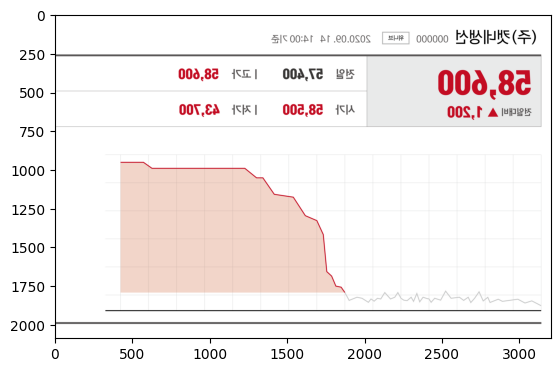

In [51]:
# !pip install Pillow
# !pip install Matplotlib

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 이미지 불러오기 
cat = Image.open('cats_stock.png')

# 배열로 변환 
pixel = np.array(cat)

plt.imshow(pixel[::-1]) # 상하 반전 
plt.imshow(pixel[:, ::-1]) # 좌우 반전 

# print(pixel.shape) # (2088, 3204, 4)

4. SK 하이닉스 2020년도 데이터를 출력하고 그 시가 데이터를 그래프로 나타내주세요.

<Axes: xlabel='Date'>

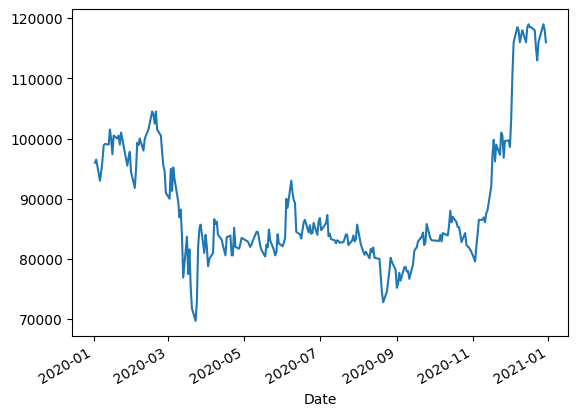

In [52]:
import FinanceDataReader as fdr

# 한국주식거래소에서 sk하이닉스 코드 확인
df_krx = fdr.StockListing('krx') # sk code = '000660'

# sk 하이닉스 단일 종목 조회
sk_df = fdr.DataReader('000660', '2020', '2021')

# 시가 그래프
sk_df['Open'].plot()

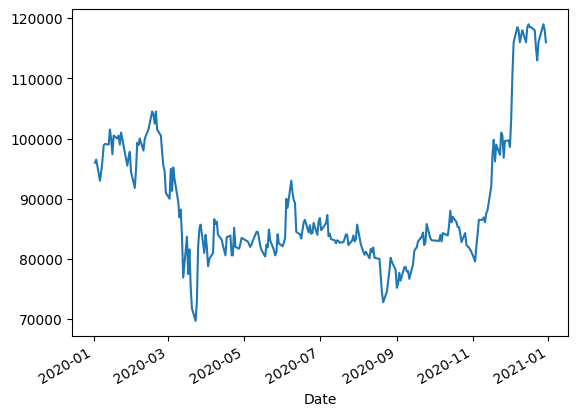

In [53]:
def get_stock_code_by_name(stock_name, df_krx):
    """주식 종목명(stock_name)에 해당하는 종목 코드를 데이터프레임(df_krx)에서 찾아 반환합니다."""
    symbol = df_krx[df_krx["Name"] == stock_name]["Code"].tolist()
    if len(symbol) == 0:
        raise ValueError("해당 종목을 찾을 수 없습니다.")
    return symbol[0]

def get_stock_data(stock_name, year=None, df_krx=None):
    """
    주식 종목명(stock_name)에 해당하는 종목의 주식 데이터를 가져옵니다.
    year를 지정하지 않을 경우, 최근 연도의 데이터를 가져옵니다.
    df_krx는 종목 코드와 종목명을 포함한 데이터프레임입니다.
    """

    stock_code = get_stock_code_by_name(stock_name, df_krx)

    if year is None:
        year = pd.Timestamp.now().year

    try:
        df_stock = fdr.DataReader(stock_code, str(year))
        df_stock = df_stock.loc[str(year)]
        return df_stock
    except KeyError:
        raise ValueError("종목 코드가 잘못되었습니다.")
    except (ConnectionError, HTTPError):
        raise ValueError("주식 데이터를 가져오는 동안 연결 오류가 발생했습니다.")
    except Exception as e:
        raise ValueError(f"주식 데이터를 가져오는 중 오류가 발생했습니다: {e}")

# SK하이닉스의 2020년 주식 데이터 가져오기
try:
    df_sk = get_stock_data("SK하이닉스", year=2020, df_krx=df_krx)
    df_sk["Open"].plot()
except ValueError as e:
    print(f"에러: {e}")